# ***Importing Keras libraries***

In [ ]:
import keras

# ***Importing ImageDataGenerator from Keras***

In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# ***Defining the Parameters***

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

# ***Mounting Dataset from drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Applying ImageDataGenerator functionality to train dataset***

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


# ***Applying ImageDataGenerator functionality to test dataset***

In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


# ***Importing Model Building Libraries***

In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

# ***Initializing the model***

In [ ]:
model = Sequential()

# ***Adding CNN Layers***

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

# ***Add Dense layers***

In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

# ***configuring the learning process***

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

# ***Training the model***

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 27s 2s/step - loss: 0.6717 - accuracy: 0.7179 - val_loss: 0.2061 - val_accuracy: 0.9752
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.2970 - accuracy: 0.8647 - val_loss: 0.1153 - val_accuracy: 0.9587
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.2108 - accuracy: 0.9197 - val_loss: 0.0839 - val_accuracy: 0.9835
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 0.1764 - accuracy: 0.9335 - val_loss: 0.0778 - val_accuracy: 0.9835
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 0.1776 - accuracy: 0.9151 - val_loss: 0.0745 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 22s 2s/step - loss: 0.1805 - accuracy: 0.9220 - val_loss: 0.0888 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.1836 - accuracy: 0.9220 - val_loss: 0.1820 - val_accuracy: 0.8926
Epoch 8/10
14/14 [==

# ***Save the model***

In [ ]:
model.save("forest.h5")

# ***Predictions***

In [ ]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img('/content/drive/MyDrive/Dataset/test_set/with fire/with fire (2).jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [ ]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 65ms/step


1

In [ ]:
if pred==1:
  print('Forest fire')
elif pred==0:
  print('No Fire')

Forest fire


# ***Open cv for video processing***

In [ ]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [ ]:
import librosa
import IPython.display as ipd

# ***Sending Alert Message***

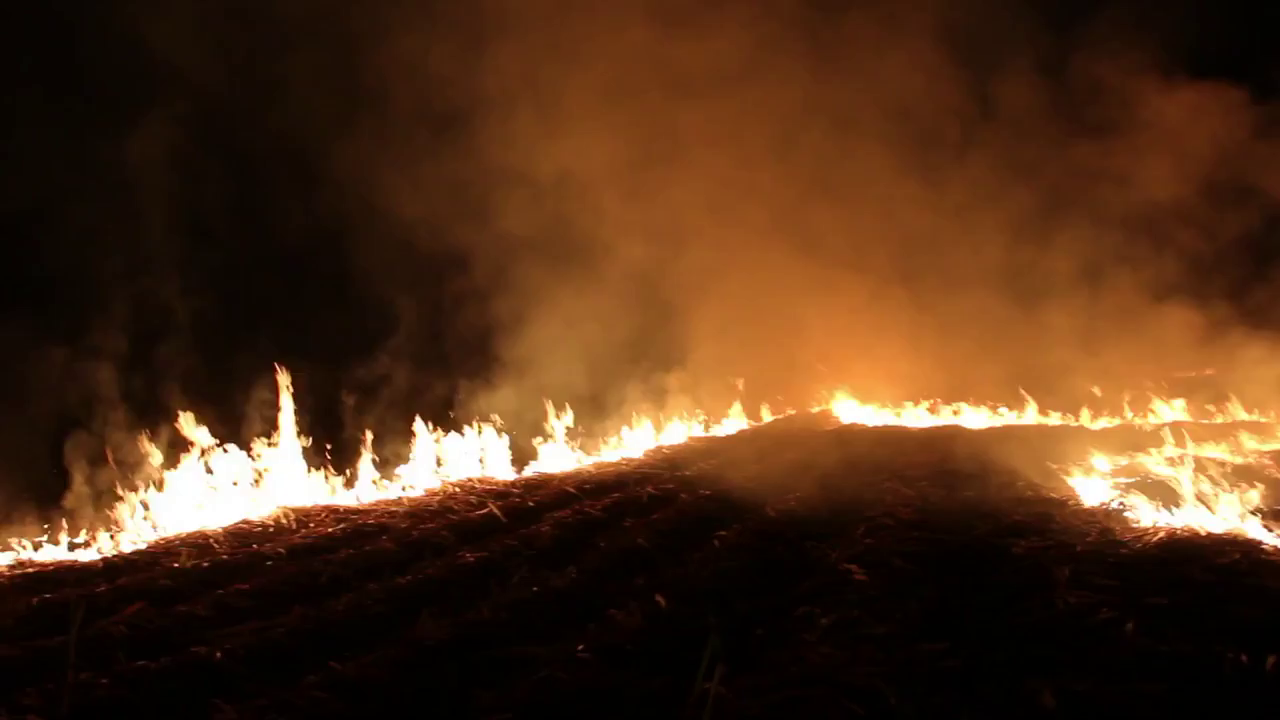

1/1 [==============================] - 0s 72ms/step
Forest fire


In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Dataset/forestfire.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2_imshow(frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("forest.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='ACc0b32842aa3060ee6f4b2bfa1116247f'
  auth_token='c6a97bddc96eaf4803622bd76e8a96ff'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+14793974371',
      #to number
      to='+919025496556')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
SMec81b82db0acf7d045fef55e153ac0a1
Fire detected
SMS Sent!
